In [1]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

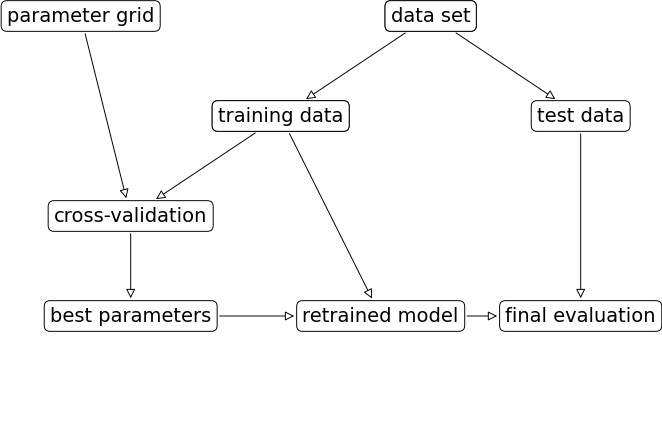

In [2]:
mglearn.plots.plot_grid_search_overview()

In [3]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [4]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

Now we will construct our parameter grid

In [6]:
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "max_features": ["sqrt", 9, None], 
} # Total features = n_estimates x max_depths X max_features = 4 x 4 x 3 = 48


gs = GridSearchCV(rf, param_grid = param_grid, n_jobs=-1, return_train_score= True) 

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [7]:
# Carry out the search 
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 9, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [8]:
# Get the best hyperparameter values
gs.best_params_

{'max_depth': None, 'max_features': 9, 'n_estimators': 100}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [9]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.469215,0.227193,0.164666,0.006402,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.865689,0.876043,...,0.876546,0.006425,48,0.880196,0.883647,0.889760,0.883871,0.883080,0.884111,0.003117
1,9.769521,0.968954,0.292909,0.124339,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.879494,0.886109,...,0.881206,0.002576,44,0.888465,0.886020,0.889185,0.890271,0.890055,0.888799,0.001531
2,22.964349,0.616884,0.581389,0.136215,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.882945,0.884383,...,0.880515,0.002950,45,0.892061,0.889688,0.889400,0.889983,0.890703,0.890367,0.000951
3,44.958722,2.281776,0.913065,0.181419,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.881795,0.884671,...,0.882414,0.002885,40,0.889113,0.887602,0.890695,0.891206,0.891350,0.889993,0.001435
4,4.358496,0.441124,0.146026,0.038652,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.883808,0.880357,...,0.880170,0.004584,46,0.891486,0.893427,0.891414,0.887035,0.891565,0.890985,0.002114
5,21.064365,2.693383,0.243547,0.152112,5,9,50,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.881219,0.884958,...,0.882989,0.001865,39,0.891630,0.894506,0.891917,0.892428,0.892932,0.892683,0.001015
6,46.643355,1.496326,0.500474,0.099198,5,9,100,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.882657,0.887834,...,0.885118,0.003137,37,0.892852,0.896591,0.895441,0.895520,0.893004,0.894682,0.001489
7,92.390902,1.654525,1.104147,0.054415,5,9,200,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.881507,0.885534,...,0.884830,0.002612,38,0.893499,0.895225,0.894434,0.894729,0.895017,0.894581,0.000603
8,7.269562,1.018784,0.186955,0.042510,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.872879,0.871441,...,0.878963,0.005802,47,0.885733,0.888465,0.889544,0.893075,0.890055,0.889375,0.002378
9,40.898898,2.802710,0.225934,0.103432,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.876330,0.876043,...,0.882012,0.006013,42,0.888825,0.894794,0.890407,0.894298,0.894082,0.892481,0.002403


Let's look at only the most relevant rows

In [10]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [ ]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

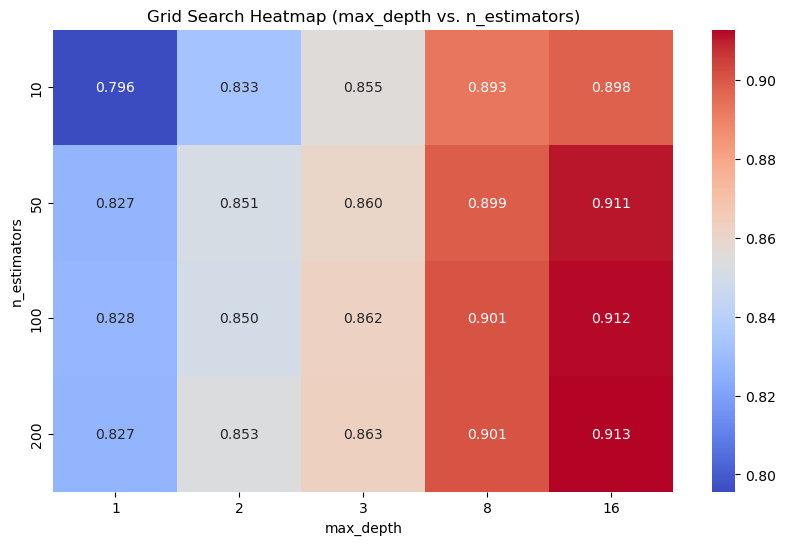

In [11]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()

# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1, 2, 3, 8, 16],
    "n_estimators": [10, 50, 100, 200]
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.